# Aviation_Accident_Database_Project
## Introduction

This presentation will explore the main reasons behind aviation accidents dating back to 1948.
We aim to identify patterns and causes to provide suggestions for improving the safety of air travel.

## objectives
* to clean up the data
* to find out the number of accidents that have happened 
* to find out how many passangers were injured or killed
* to find out the cause of the crashes
* what is the majour contribution to accidents (pilot error or other)
* airline with most accidents
* country with most accidents


### Loading files

In [36]:
#importing the necesarry libraries
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#checking the files in the folder
!ls    

AviationData.csv
Aviation_Accident_Database_Project.ipynb
Project_powerpoint_pdf
README.md
USState_Codes.csv
tableau worksheet
~tableau worksheet__11420.twbr


In [38]:
#loading the first file ("AviationData.csv")
with open("AviationData.csv") as f:
    reader = csv.reader(f)
    data = list(reader)  
df = pd.DataFrame(data)
df.head()
# most of the columns appear to be empty but do not contain the NaN

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,,,,,...,Personal,,2,0,0,0,UNK,Cruise,Probable Cause,
2,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,,,,,...,Personal,,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
3,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,,,...,Personal,,3,,,,IMC,Cruise,Probable Cause,26-02-2007
4,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,,,,,...,Personal,,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000


In [39]:
#loading the second file
codes = pd.read_csv("USState_Codes.csv")
codes.head()
# since the first data set has ['Location'] and we are focusing on the country of the incidents there is no need to further look into each state

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### Analysing  the dataset and looking for missing values

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88890 entries, 0 to 88889
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       88890 non-null  object
 1   1       88890 non-null  object
 2   2       88890 non-null  object
 3   3       88890 non-null  object
 4   4       88890 non-null  object
 5   5       88890 non-null  object
 6   6       88890 non-null  object
 7   7       88890 non-null  object
 8   8       88890 non-null  object
 9   9       88890 non-null  object
 10  10      88890 non-null  object
 11  11      88890 non-null  object
 12  12      88890 non-null  object
 13  13      88890 non-null  object
 14  14      88890 non-null  object
 15  15      88890 non-null  object
 16  16      88890 non-null  object
 17  17      88890 non-null  object
 18  18      88890 non-null  object
 19  19      88890 non-null  object
 20  20      88890 non-null  object
 21  21      88890 non-null  object
 22  22      88890 non-null

In [41]:
df.shape

(88890, 31)

### Aviation data seems to not have a propper title, hence i will have to make the first(0) row into a title row


In [42]:
df.columns #cecking initial column names to confirm

RangeIndex(start=0, stop=31, step=1)

In [43]:
df.columns = df.iloc[0] #replacing the column names with the first row
df.columns #calling to confirm the changes made

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object', name=0)

In [44]:
df = df.drop(0) #dropping the first row as it contained the column titles

In [45]:
df.isna().sum() #doesnt work as the sells contain ' ' and is  non-null

0
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [46]:
#looping each column to find empty cells containing '' as they do not contribute to the dataset
results = {}
for col in df.columns:
    count = df[col].str.contains(' ').sum()
    results[col] = count
results

{'Event.Id': 0,
 'Investigation.Type': 0,
 'Accident.Number': 0,
 'Event.Date': 0,
 'Location': 88692,
 'Country': 83485,
 'Latitude': 0,
 'Longitude': 0,
 'Airport.Code': 5,
 'Airport.Name': 41222,
 'Injury.Severity': 0,
 'Aircraft.damage': 0,
 'Aircraft.Category': 91,
 'Registration.Number': 21,
 'Make': 12388,
 'Model': 10933,
 'Amateur.Built': 0,
 'Number.of.Engines': 0,
 'Engine.Type': 10197,
 'FAR.Description': 7737,
 'Schedule': 0,
 'Purpose.of.flight': 8584,
 'Air.carrier': 15997,
 'Total.Fatal.Injuries': 0,
 'Total.Serious.Injuries': 0,
 'Total.Minor.Injuries': 0,
 'Total.Uninjured': 0,
 'Weather.Condition': 0,
 'Broad.phase.of.flight': 0,
 'Report.Status': 80303,
 'Publication.Date': 0}

In [47]:
#dropping mostly empty columns 
df.drop(columns=['Number.of.Engines','Latitude','Airport.Name','Airport.Code','Airport.Code','Longitude','Air.carrier', 'Aircraft.Category', 'Schedule', 'FAR.Description', 'Registration.Number','Model','Make','Engine.Type', 'Purpose.of.flight'], inplace=True)
#keeping country and location as it is important in my analysis

In [48]:
df.shape  #previous shape = (88890, 31)

(88889, 17)

In [49]:
df.describe()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889
unique,87951,2,88863,14782,27759,220,110,5,3,126,51,58,380,5,13,17077,2925
top,20001212X19172,Accident,DCA22WA089,1984-06-30,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,No,0,0,0,0,VMC,,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,67357,64148,80312,59675,63289,61454,29879,77303,27165,61754,17019


In [50]:
df.head() #confirming changes

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,No,2,0,0,0,UNK,Cruise,Probable Cause,
2,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,No,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
3,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,No,3,,,,IMC,Cruise,Probable Cause,26-02-2007
4,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,No,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
5,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,No,1,2,,0,VMC,Approach,Probable Cause,16-04-1980


### Analysis starts


In [51]:
minimum_date = df['Event.Date'].min()[:4] #makes the code neat and short---finding the date where the records begin
print(f"there have been {len(df['Accident.Number'].value_counts())} accidents since {minimum_date}")

there have been 88863 accidents since 1948


In [52]:
df["Injury.Severity"].unique #finding the different types of injuries we might find in this dataset

<bound method Series.unique of 1         Fatal(2)
2         Fatal(4)
3         Fatal(3)
4         Fatal(2)
5         Fatal(1)
           ...    
88885        Minor
88886             
88887    Non-Fatal
88888             
88889        Minor
Name: Injury.Severity, Length: 88889, dtype: object>

### Documenting the different types of injuries


In [53]:
fatal = df[df["Injury.Severity"] == "Fatal"]
len(fatal)

5262

In [54]:
Minor = df[df["Injury.Severity"] == "Minor"]
len(Minor)

218

In [55]:
Non_Fatal = df[df["Injury.Severity"] == "Non-Fatal"]
len(Non_Fatal)

67357

In [56]:
#combining the data for a smooth flowing statement
print(f"there were {len(fatal)} fatal incidents, {len(Minor)} minor injuries and  {len(Non_Fatal)} non fatal injuries in total")

there were 5262 fatal incidents, 218 minor injuries and  67357 non fatal injuries in total


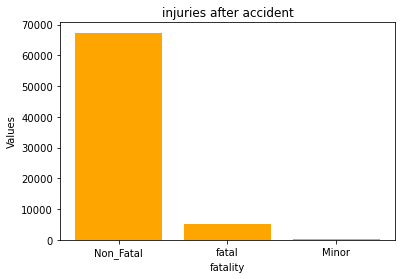

In [57]:
#creating a dicionary to plot the results in one graph
fatality_dict = { 'Non_Fatal': len(Non_Fatal),'fatal': len(fatal), 'Minor': len(Minor)}

# creating values for each axis
fatality = list(fatality_dict.keys())
values = list(fatality_dict.values())
plt.bar(fatality, values, color='orange')
plt.xlabel('fatality')
plt.ylabel('Values')
plt.title('injuries after accident')
plt.show();
#most of the injuries apear to be non-fatal

### Finding different causes of the crashes

In [58]:
#cause of crash
df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [59]:
accident = len(df[df['Investigation.Type'] == 'Accident'])
incident = len(df[df['Investigation.Type'] == 'Incident'])

In [60]:
#making the dataset cleaner by combining the information into a singe line
print(f"there are {len(df[df['Investigation.Type'] == 'Accident'])} accidents and {len(df[df['Investigation.Type'] == 'Incident'])} incidents")

there are 85015 accidents and 3874 incidents


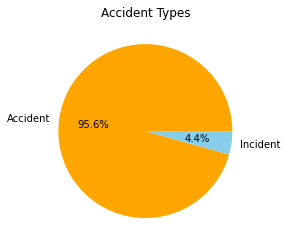

In [61]:
# Creating dictionary with data
Investigation_type = { 'Accident': accident, 'Incident': incident } 
# Creating values for the pie chart
labels = list(Investigation_type.keys())
values = list(Investigation_type.values())
plt.pie(values, labels=labels, colors=['orange', 'skyblue'], autopct='%1.1f%%')
plt.title('Accident Types')
plt.show();

### Investigating factors that could cause the accident

In [62]:
df["Weather.Condition"].unique()

array(['UNK', 'IMC', 'VMC', '', 'Unk'], dtype=object)

In [63]:
VMC = len(df[df["Weather.Condition"] == 'VMC'])
#"VMC" stands for Visual Meteorological Conditions. This indicates that the weather conditions are good enough for pilots to operate

In [64]:
IMC = len(df[df["Weather.Condition"] == 'IMC'])
#"IMC" stands for Instrument Meteorological Conditions. These conditions occur when visibility is poor, typically due to weather factors

In [65]:
UNK = len(df[df["Weather.Condition"] == 'UNK' ]) #unk = unknown or not recorded

In [66]:
Unk = len(df[df["Weather.Condition"] == 'Unk']) #unk = unknown or not recorded

In [67]:
blank = len(df[df["Weather.Condition"] == '']) 
blank #blank information

4492

In [68]:
unknown = UNK + Unk # adding the unknowns 
unknown


1118

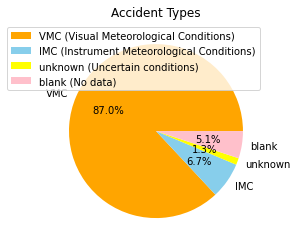

In [94]:
# pie chart of data
# Creating dictionary with data
Investigation_type = { 'VMC': VMC, 'IMC': IMC, 'unknown': unknown, 'blank': blank} 
# Creating values for the pie chart
labels = list(Investigation_type.keys())
values = list(Investigation_type.values())
plt.pie(values, labels=labels, colors=['orange', 'skyblue', 'yellow', 'pink'], autopct='%1.1f%%')
plt.title('Accident Types')
plt.legend(['VMC (Visual Meteorological Conditions)', 
            'IMC (Instrument Meteorological Conditions)', 
            'unknown (Uncertain conditions)', 
            'blank (No data)'], 
           loc="best")
plt.show();


#finding out why most of the accidents happen during visible conditions
#mandate all pilots/airlines to record flight data 

### Investigating other factors

In [70]:
weather_investigation = df[df["Weather.Condition"] == "VMC"]["Broad.phase.of.flight"]
# tying to identify which phase of flight has the highest rate of accidents during normal conditions

In [71]:
df["Broad.phase.of.flight"].value_counts()
#majour accidents caused at landing 


               27165
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

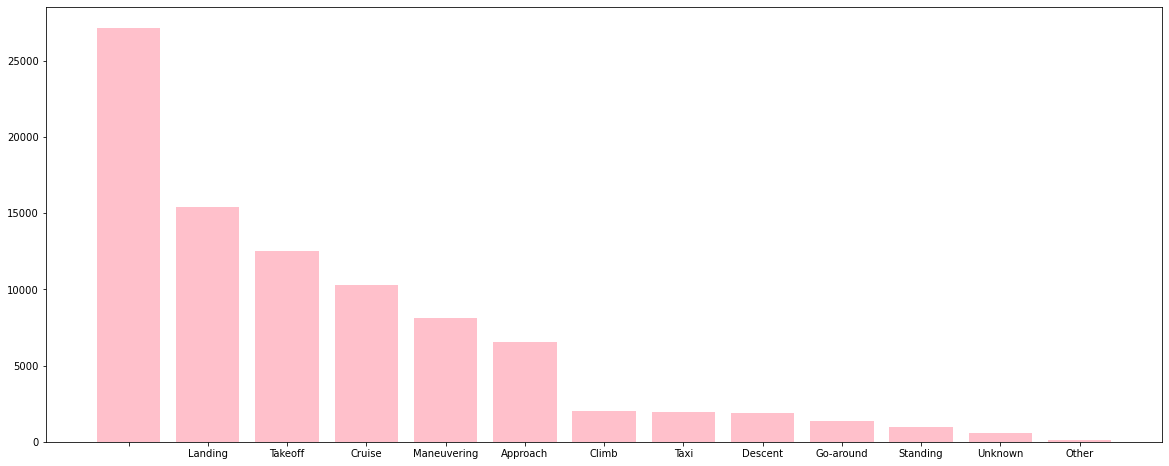

In [72]:
#plotting a bargraph for phase of flight vs accident
fig, ax = plt.subplots(figsize=(20,8))
phase = df["Broad.phase.of.flight"].value_counts().keys()
value = df["Broad.phase.of.flight"].value_counts().values
plt.bar(phase, value, color = 'pink')
plt.show();
# recomendations
# train pilots on landing
#record more inflight weather conditions
#27165 entries are left blank

In [73]:
df['Report.Status'].value_counts()
#What Is Probable Cause
#Probable cause is legal justification for a police officer to make an arrest, obtain a warrant, or search a person or his property.

Probable Cause                                                                                                                                                                                                                                                                                                                                                                             61754
                                                                                                                                                                                                                                                                                                                                                                                            6380
Foreign                                                                                                                                                                                                                               

In [74]:
probable = len(df[df['Report.Status'] == 'Probable Cause'])
# finding the number of accidents reported as probable

In [75]:
foreign = len(df[df['Report.Status'] == 'Foreign'])
# finding the number of accidents reported as foreign

In [76]:
len(df[df['Report.Status'] == '<br /><br />'])
# finding the number of accidents reported incorectly

167

In [77]:
factual = len(df[df['Report.Status'] == 'Factual'])
# finding the number of accidents reported as factual

In [78]:
to_delete = []
for i, row in df.iterrows():
    if '<br /><br />' in row.values:
        to_delete.append(i)

# Dropping rows with the identified indices
df_cleaned = df.drop(index=to_delete)


In [79]:
df.shape

(88889, 17)

In [80]:
df_cleaned.shape

(88722, 17)

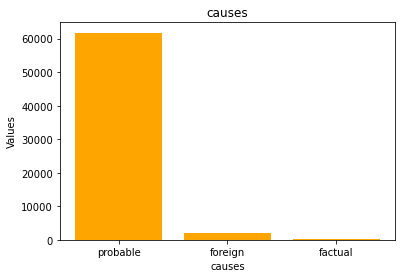

In [81]:
#creating a dicionary to plot the results in one graph
causes_dict = { 'probable': probable,'foreign': foreign, 'factual': factual}

# creating values for each axis
cause = list(causes_dict.keys())
values = list(causes_dict.values())
plt.bar(cause, values, color='orange')
plt.xlabel('causes')
plt.ylabel('Values')
plt.title('causes')
plt.show();

#most accidents are caused due to pilot error
#possible solution is to increade training to reduce errors 
#each report status statement is different each statement has to be read individually to trully understand the cause of the crash

In [82]:
#conditions of the planes after the crash
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
                3194
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

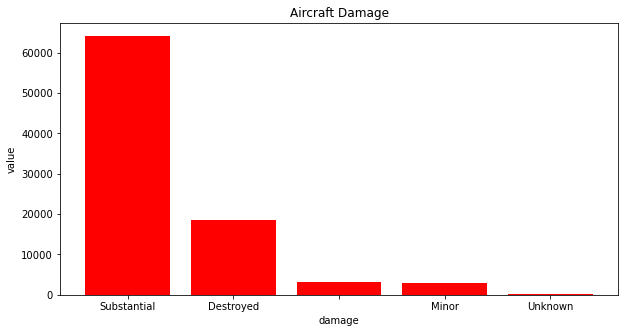

In [83]:

fig, ax = plt.subplots(figsize=(10,5))
damage = df['Aircraft.damage'].value_counts().keys()
value = df['Aircraft.damage'].value_counts().values
plt.bar(damage, value, color = 'red')
plt.xlabel('damage')
plt.ylabel('value')
plt.title('Aircraft Damage')
plt.show();

In [84]:
#does ameture built planes cause more accidents?
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
         102
Name: Amateur.Built, dtype: int64

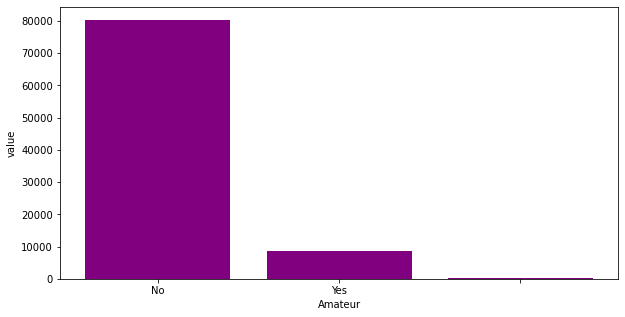

In [85]:

fig, ax = plt.subplots(figsize=(10,5))
Amateu = df['Amateur.Built'].value_counts().keys()
value = df['Amateur.Built'].value_counts().values
plt.bar(Amateu, value, color = 'purple')
plt.xlabel('Amateur')
plt.ylabel('value')
plt.title('')
plt.show();

In [86]:
#method to show tht ametaur build does not coorelate with accident proneness
ametaur_damage = df[['Aircraft.damage', 'Amateur.Built']]
ametaur_damage

,Aircraft.damage,Amateur.Built
1,Destroyed,No
2,Destroyed,No
3,Destroyed,No
4,Destroyed,No
5,Destroyed,No
...,...,...
88885,,No
88886,,No
88887,Substantial,No
88888,,No


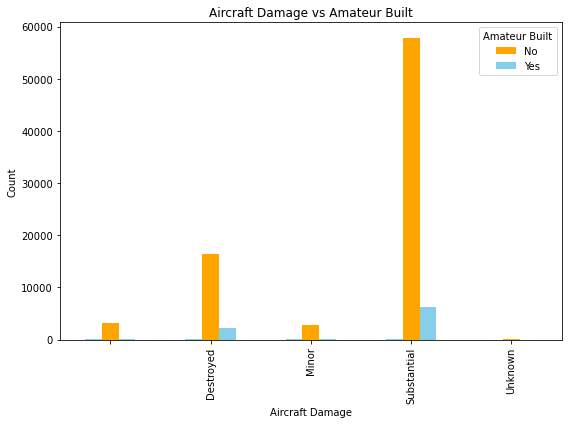

In [87]:
grouped_data = df.groupby(['Aircraft.damage', 'Amateur.Built']).size().unstack()
grouped_data.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Aircraft Damage vs Amateur Built')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.legend(title='Amateur Built')
plt.tight_layout()
#majoritty of the crashes are done by profesional built aircrafts and most of the damage is substantial

# which country has the most accidents?

In [88]:
df['Country'].value_counts()[:10]

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
                    226
Bahamas             216
Name: Country, dtype: int64

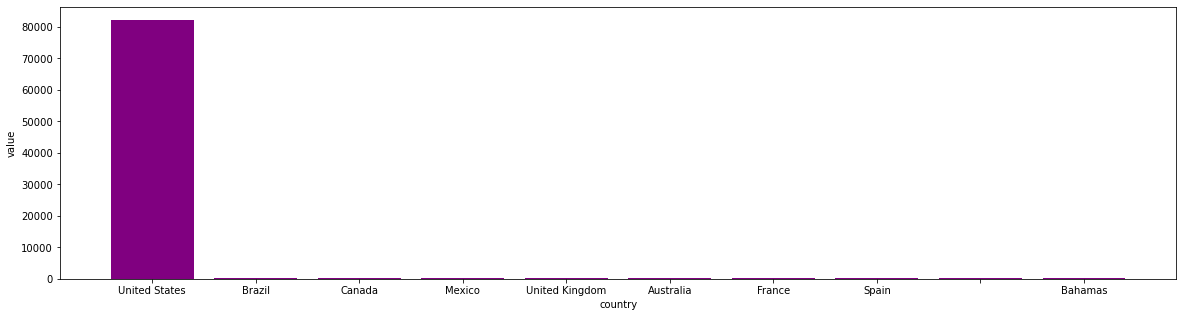

In [89]:
#the data is more in favour of the USA seems like there is missing information with the other countries
#we will focus on USA
fig, ax = plt.subplots(figsize=(20,5))
country = df['Country'].value_counts()[:10].keys()
value = df['Country'].value_counts()[:10].values
plt.bar(country, value, color = 'purple')
plt.xlabel('country')
plt.ylabel('value')
plt.title('')
plt.show();

In [90]:
len(df[(df['Country'] == 'United States') & (df['Weather.Condition'] == 'VMC')])
#weather conditions are mostly clear so weather is not a main reason to crashes

75317

In [91]:
df['Location'].value_counts()

ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
Walker, CA            1
DALE, IN              1
Windsor, CO           1
Ormond beach, FL      1
Brownsville, CA       1
Name: Location, Length: 27759, dtype: int64

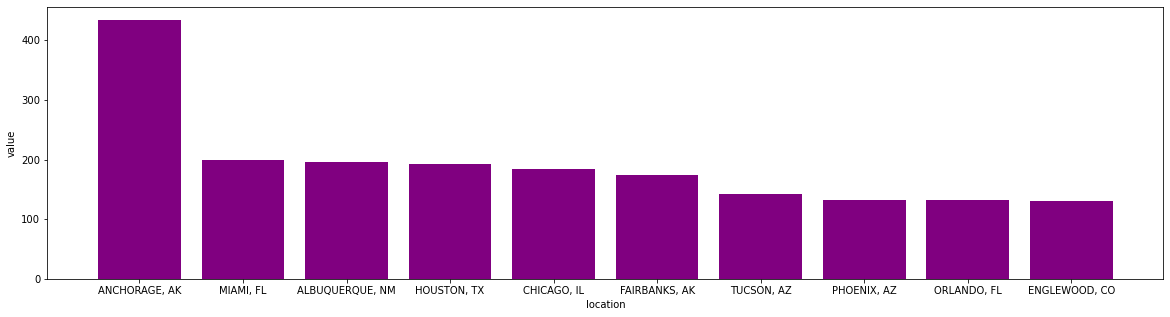

In [92]:
#to find out which state has the highest accident
fig, ax = plt.subplots(figsize=(20,5))
location = df['Location'].value_counts()[:10].keys()
value = df['Location'].value_counts()[:10].values
plt.bar(location, value, color = 'purple')
plt.xlabel('location')
plt.ylabel('value')
plt.title('')
plt.show();

In [93]:
len(df[(df['Location'] == 'ANCHORAGE, AK') & (df['Weather.Condition'] == 'VMC')])
#414 of the accidents happened during VMC

414

## Analysis
The data shows that 95.6% of crashes are accidents, which happen more often than incidents. Most accidents are caused by pilot error, but there are other factors too, like overconfidence, busy air traffic, distractions, runway problems, and miscommunications with traffic control. Surprisingly, many accidents happen in clear weather. Landing is the riskiest part of a flight because it involves a lot of factors and little time to fix mistakes. However, as technology improves, airplanes have become safer, and the number of injuries has gone down.


## Recomendations
* Train pilots more on landing and takeoff emergency scenarios
* Increase their mandatory flight hours on a training simulator as Prospective commercial pilots typically log at least 250 hours of 
 flying time to earn their license
* Optimize air traffic management systems with AI-based solutions for smoother coordination.
* Improve communication tools between pilots and air traffic controllers.
* Expand infrastructure to handle increasing air traffic efficiently.
* Standardize communication protocols to reduce ambiguity.
* Invest in reliable backup systems for uninterrupted communication.


### Links
* Powerpoint presentation: https://docs.google.com/presentation/d/1ytu83b6jLZPcnG6btw22G82pGBaod7TEUOXxrFlFVCs/edit?usp=sharing
* tableau public Tableau public: [Aviation Accident Project | Tableau Public](https://public.tableau.com/app/profile/eric.giitwa/viz/AviationAccidentProject/Dashboard1)

